<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/main/Sample_Project_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating Building Drawing Using Image processing

##Importing Necessary Libraries

In [ ]:
pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
pip install ezdxf svgpathtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import svgwrite
import ezdxf
import svgpathtools
from google.colab import files


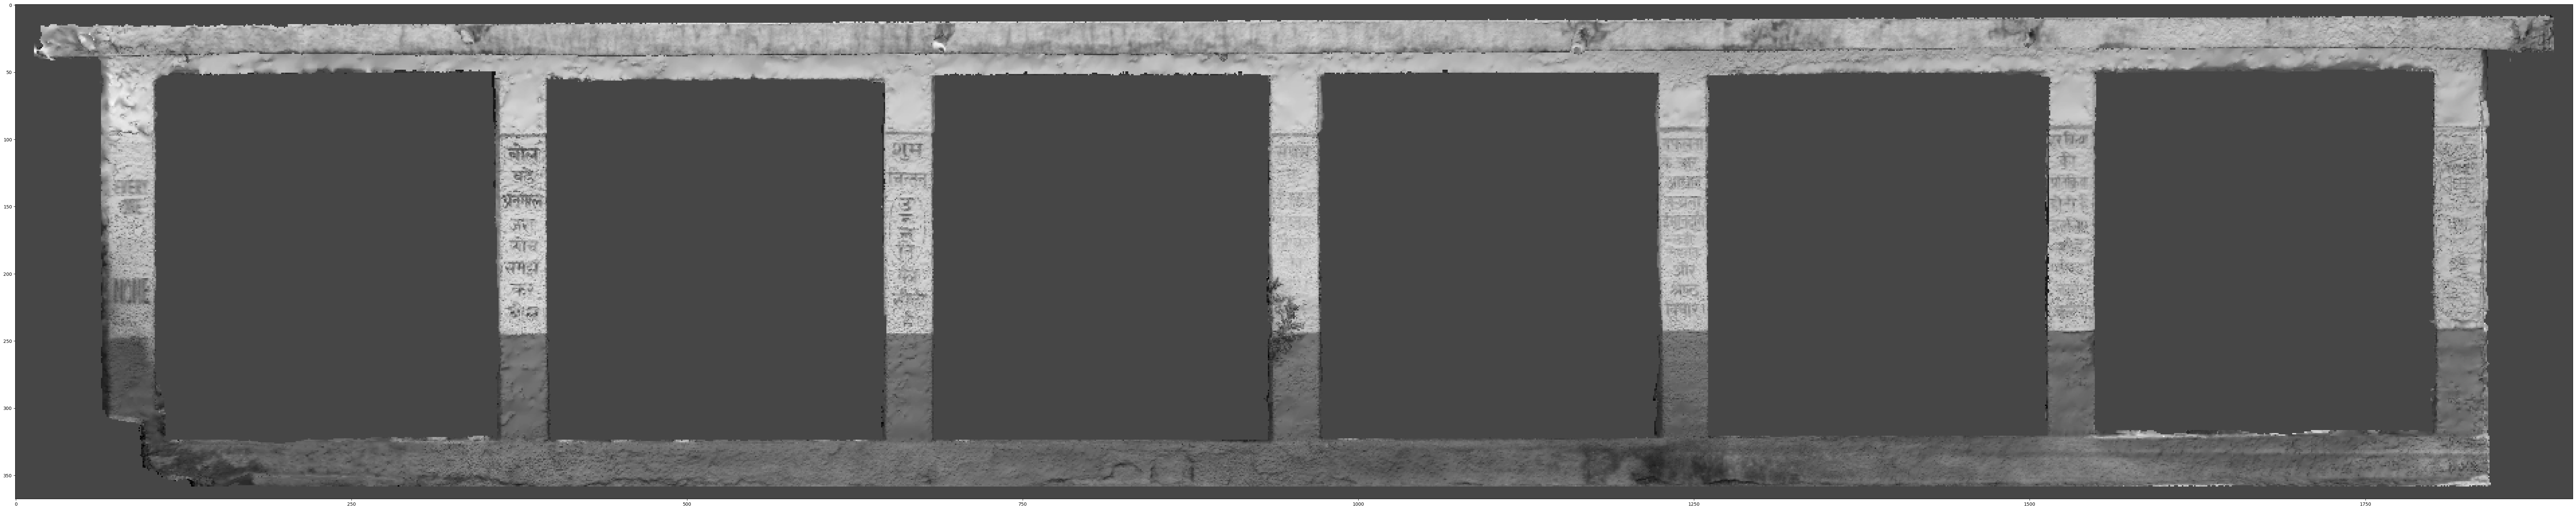

In [ ]:
#img=cv2.imread('/content/drive/MyDrive/DATASETS/dco1.png')
#img=cv2.imread('/content/drive/MyDrive/DATASETS/square.png',cv2.IMREAD_GRAYSCALE)
#img=cv2.imread('/content/drive/MyDrive/DATASETS/govt school kakiyar.png',cv2.IMREAD_GRAYSCALE)
img=cv2.imread('/content/drive/MyDrive/DATASETS/gsck1.png',cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(100, 50))
plt.imshow(img,cmap='gray')

##Edge Detector 1.1

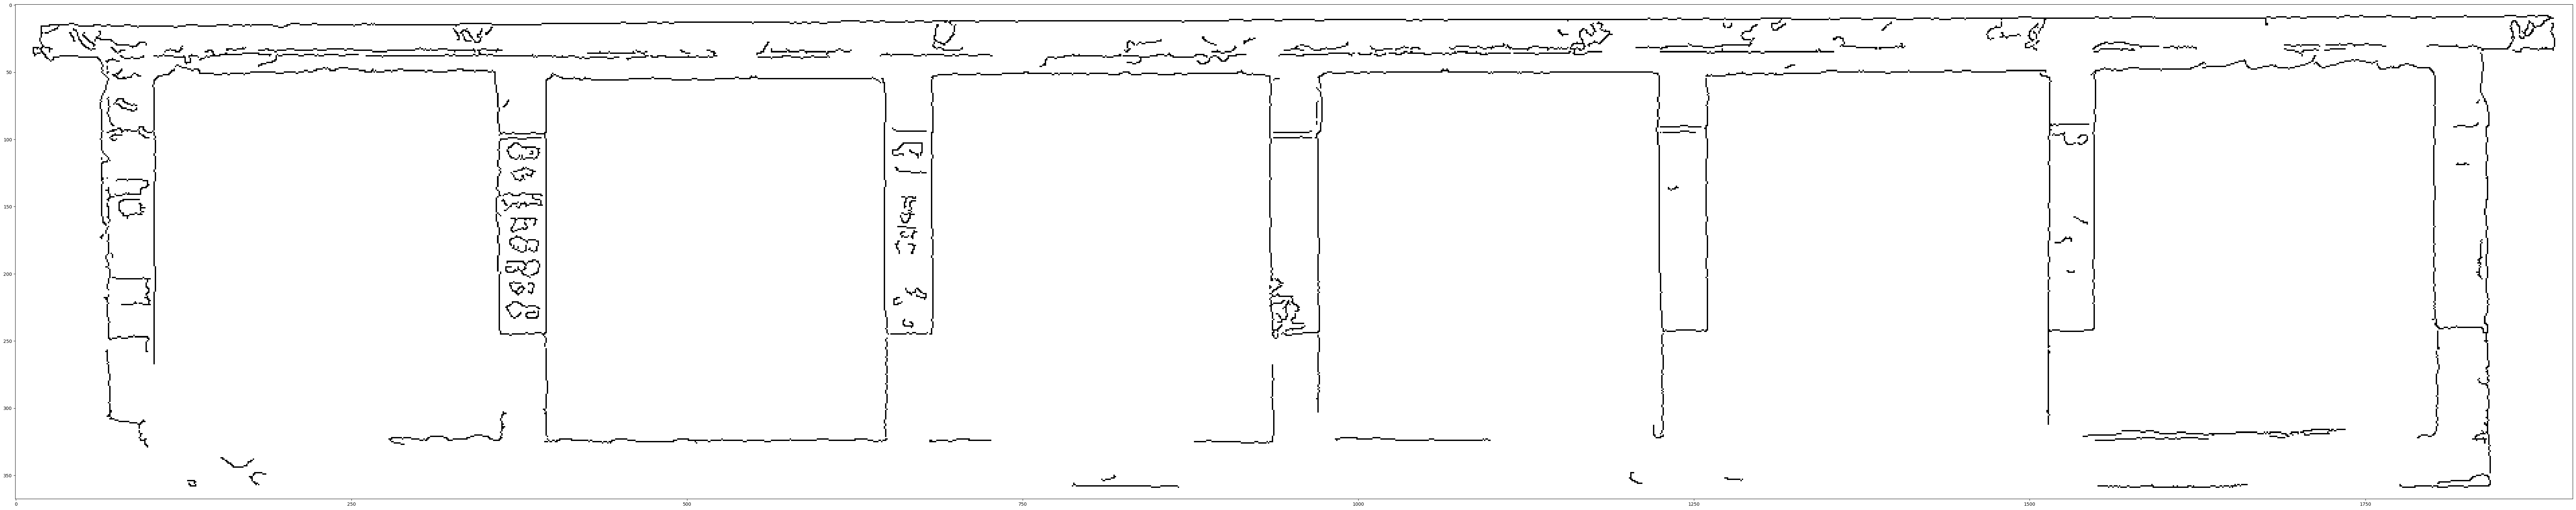

In [ ]:
#kernel = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
kernel = np.ones((1,1), np.uint8)

a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,60,110)

dilated = cv2.dilate(im1, kernel, iterations=1)

eroded = cv2.erode(im1, kernel, iterations=1)

dilated = cv2.dilate(eroded, kernel2, iterations=1)

plt.figure(figsize=(100, 50))
plt.imshow(dilated,cmap='gray')

##Converting to Svg

In [ ]:
# Load the image
# image = eroded.copy()
image=dilated.copy()
#image = img.copy()

# Convert to binary (assuming black line on white background)
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create SVG
dwg = svgwrite.Drawing('filled_contours.svg', profile='tiny')

# Fill the contours instead of just outlining them
for contour in contours:
    path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour) + " Z"
    dwg.add(dwg.path(d=path_data, fill="black", stroke="none"))  # Filled black shape

#dwg.save()
print("SVG saved as filled_contours.svg")


# Apply erosion to shrink the filled shapes
kernel = np.ones((1,1), np.uint8)  # 3x3 kernel
eroded = cv2.erode(binary, kernel, iterations=3)  # Adjust iterations as needed

# Save the eroded image for debugging
#cv2.imwrite("eroded.png", eroded)


# Find contours again after erosion
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a new SVG for the thinned result
dwg = svgwrite.Drawing('thinned_lines.svg', profile='tiny')

# Draw only the thinned (eroded) contours as a line
for contour in contours:
    path_data = "M " + " L ".join(f"{p[0][0]},{p[0][1]}" for p in contour)
    dwg.add(dwg.path(d=path_data, stroke="black", fill="none"))

dwg.save()
print("SVG saved as thinned_lines.svg")



SVG saved as filled_contours.svg
SVG saved as thinned_lines.svg


##Convert to DXF

In [ ]:
# Load the SVG file
svg_file = "thinned_lines.svg"
paths, attributes = svgpathtools.svg2paths(svg_file)

# Determine SVG bounding box (height)
svg_height = max(max(seg.start.imag, seg.end.imag) for path in paths for seg in path)

# Create a new DXF document
doc = ezdxf.new()
msp = doc.modelspace()

# Convert SVG paths to DXF polylines (flip Y-axis)
for path in paths:
    dxf_points = [(seg.start.real, svg_height - seg.start.imag) for seg in path]  # Flip y-coordinates
    if dxf_points:
        msp.add_lwpolyline(dxf_points, close=False)  # Creates a lightweight polyline

# Save DXF file
dxf_file = "output.dxf"
doc.saveas(dxf_file)

# Automatically download the DXF file
files.download(dxf_file)

print(f"DXF file '{dxf_file}' downloaded successfully (Y-axis flipped)!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DXF file 'output.dxf' downloaded successfully (Y-axis flipped)!


ML